# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

__Directions:__ Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions. 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [15]:
df

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7235,Zimbabwe,ZW,ZWE,2009,125.0,578.0,NaN,3471.0,681.0,293.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7236,Zimbabwe,ZW,ZWE,2010,150.0,710.0,2208.0,1682.0,761.0,350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7237,Zimbabwe,ZW,ZWE,2011,152.0,784.0,2467.0,2071.0,780.0,377.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7238,Zimbabwe,ZW,ZWE,2012,120.0,783.0,2421.0,2086.0,796.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

## Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

In [17]:
num_countries = df['country'].nunique()
print("Number of countries:", num_countries)


Number of countries: 219


In [18]:
min_year = df['year'].min()
max_year = df['year'].max()
print("Timespan of the data:", min_year, "to", max_year)

Timespan of the data: 1980 to 2013


In [19]:
counts = df.groupby(['country', 'year']).size().reset_index(name='count')

num_years = len(df['year'].unique())

all_years_present = all(counts['count'] == num_years)

print(all_years_present)

False


In [20]:
total_years = len(df.year.unique())

missing_years = df.groupby('country').year.nunique()
missing_years = missing_years[missing_years < total_years]

print(missing_years)

country
Bonaire, Saint Eustatius and Saba     4
Curacao                               4
Montenegro                            9
Netherlands Antilles                 30
Serbia                                9
Serbia & Montenegro                  25
Sint Maarten (Dutch part)             4
South Sudan                           3
Timor-Leste                          12
Name: year, dtype: int64


In [21]:
mask = df.iloc[:, 3:57].notna()
any_mask = mask.any(axis=1)
num_rows = any_mask.sum()
print("Number of rows with at least one non-null value across columns 3-57:", num_rows)


Number of rows with at least one non-null value across columns 3-57: 3483


## Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

```
  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
 ```

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

__Note__: You can use `replace` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [22]:
diag_mapping = {'newsp': 'Pulmonary Smear (+)',
                'newsn': 'Pulmonary Smear (-)',
                'newep': 'Extrapulmonary',
                'newrel': 'Relapse'}

df_long = pd.melt(df, id_vars=['country', 'year'], var_name='diagnosis method', value_name='number of cases')
df_long['diagnosis method'] = df_long['diagnosis method'].replace(diag_mapping)
df_long['gender'] = 'All'
df_long = df_long[['country', 'year', 'diagnosis method', 'gender', 'number of cases']]

## Question 3: Create a graph that shows when countries started to report TB cases.

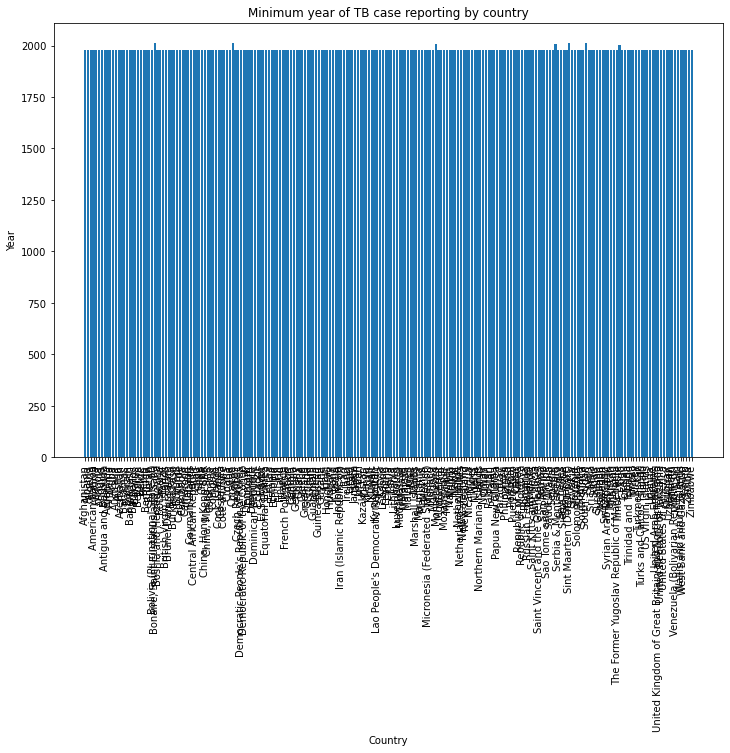

In [30]:
min_year = df.groupby('country')['year'].min().reset_index()
plt.figure(figsize=(12, 8))
plt.bar(min_year['country'], min_year['year'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Year')
plt.title('Minimum year of TB case reporting by country')
plt.show()